<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# Support Vector Machines (SVMs) using scikit-learn in Python
Hi Guys,<br>

Welcome to the Support Vector Machines lecture using scikit-learn in Python.<br>

As suggested in the theory lecture, we are going to work with a real dataset on [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data). <br><br>

<font style="font-size:12px;color:green;">&#9758; The dataset is available on kaggle and originally belong to [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). This dataset was donated to UCI by Nick Street in 1995 for the public use. [Relevant Papers](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) and [detailed description](https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names) on the dataset is provided at UCI website.<br></font>

Because we have worked with this dataset in Logistic Regression and KNN sections, so, this will allow us to compare the SVM to those models. However, in the SVM project, we will work with another new and real life dataset on credit approval. <br>

&#9758; Breast cancer dataset can be loaded from Scikit-learn. Its up to you if you want to load from scikit-learn or use csv data file which is provided in the course material.<br>
I am going to load the one which is in the course material!<br>
First thing first, let's import some libraries!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Breast_Cancer_Diagnostic.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

We will only consider ten real-valued features in this project for diagnostic!
Please separate the required features along with diagnosis column (list of the columns is bewlow) and display the head of the data.
['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']

In [5]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,M


## EDA
As we are already familiar with breast cancer dataset, so, we can save some time in EDA as well. Let's have a quick look on the pair plot and instances in each target class using `value_counts()`. 

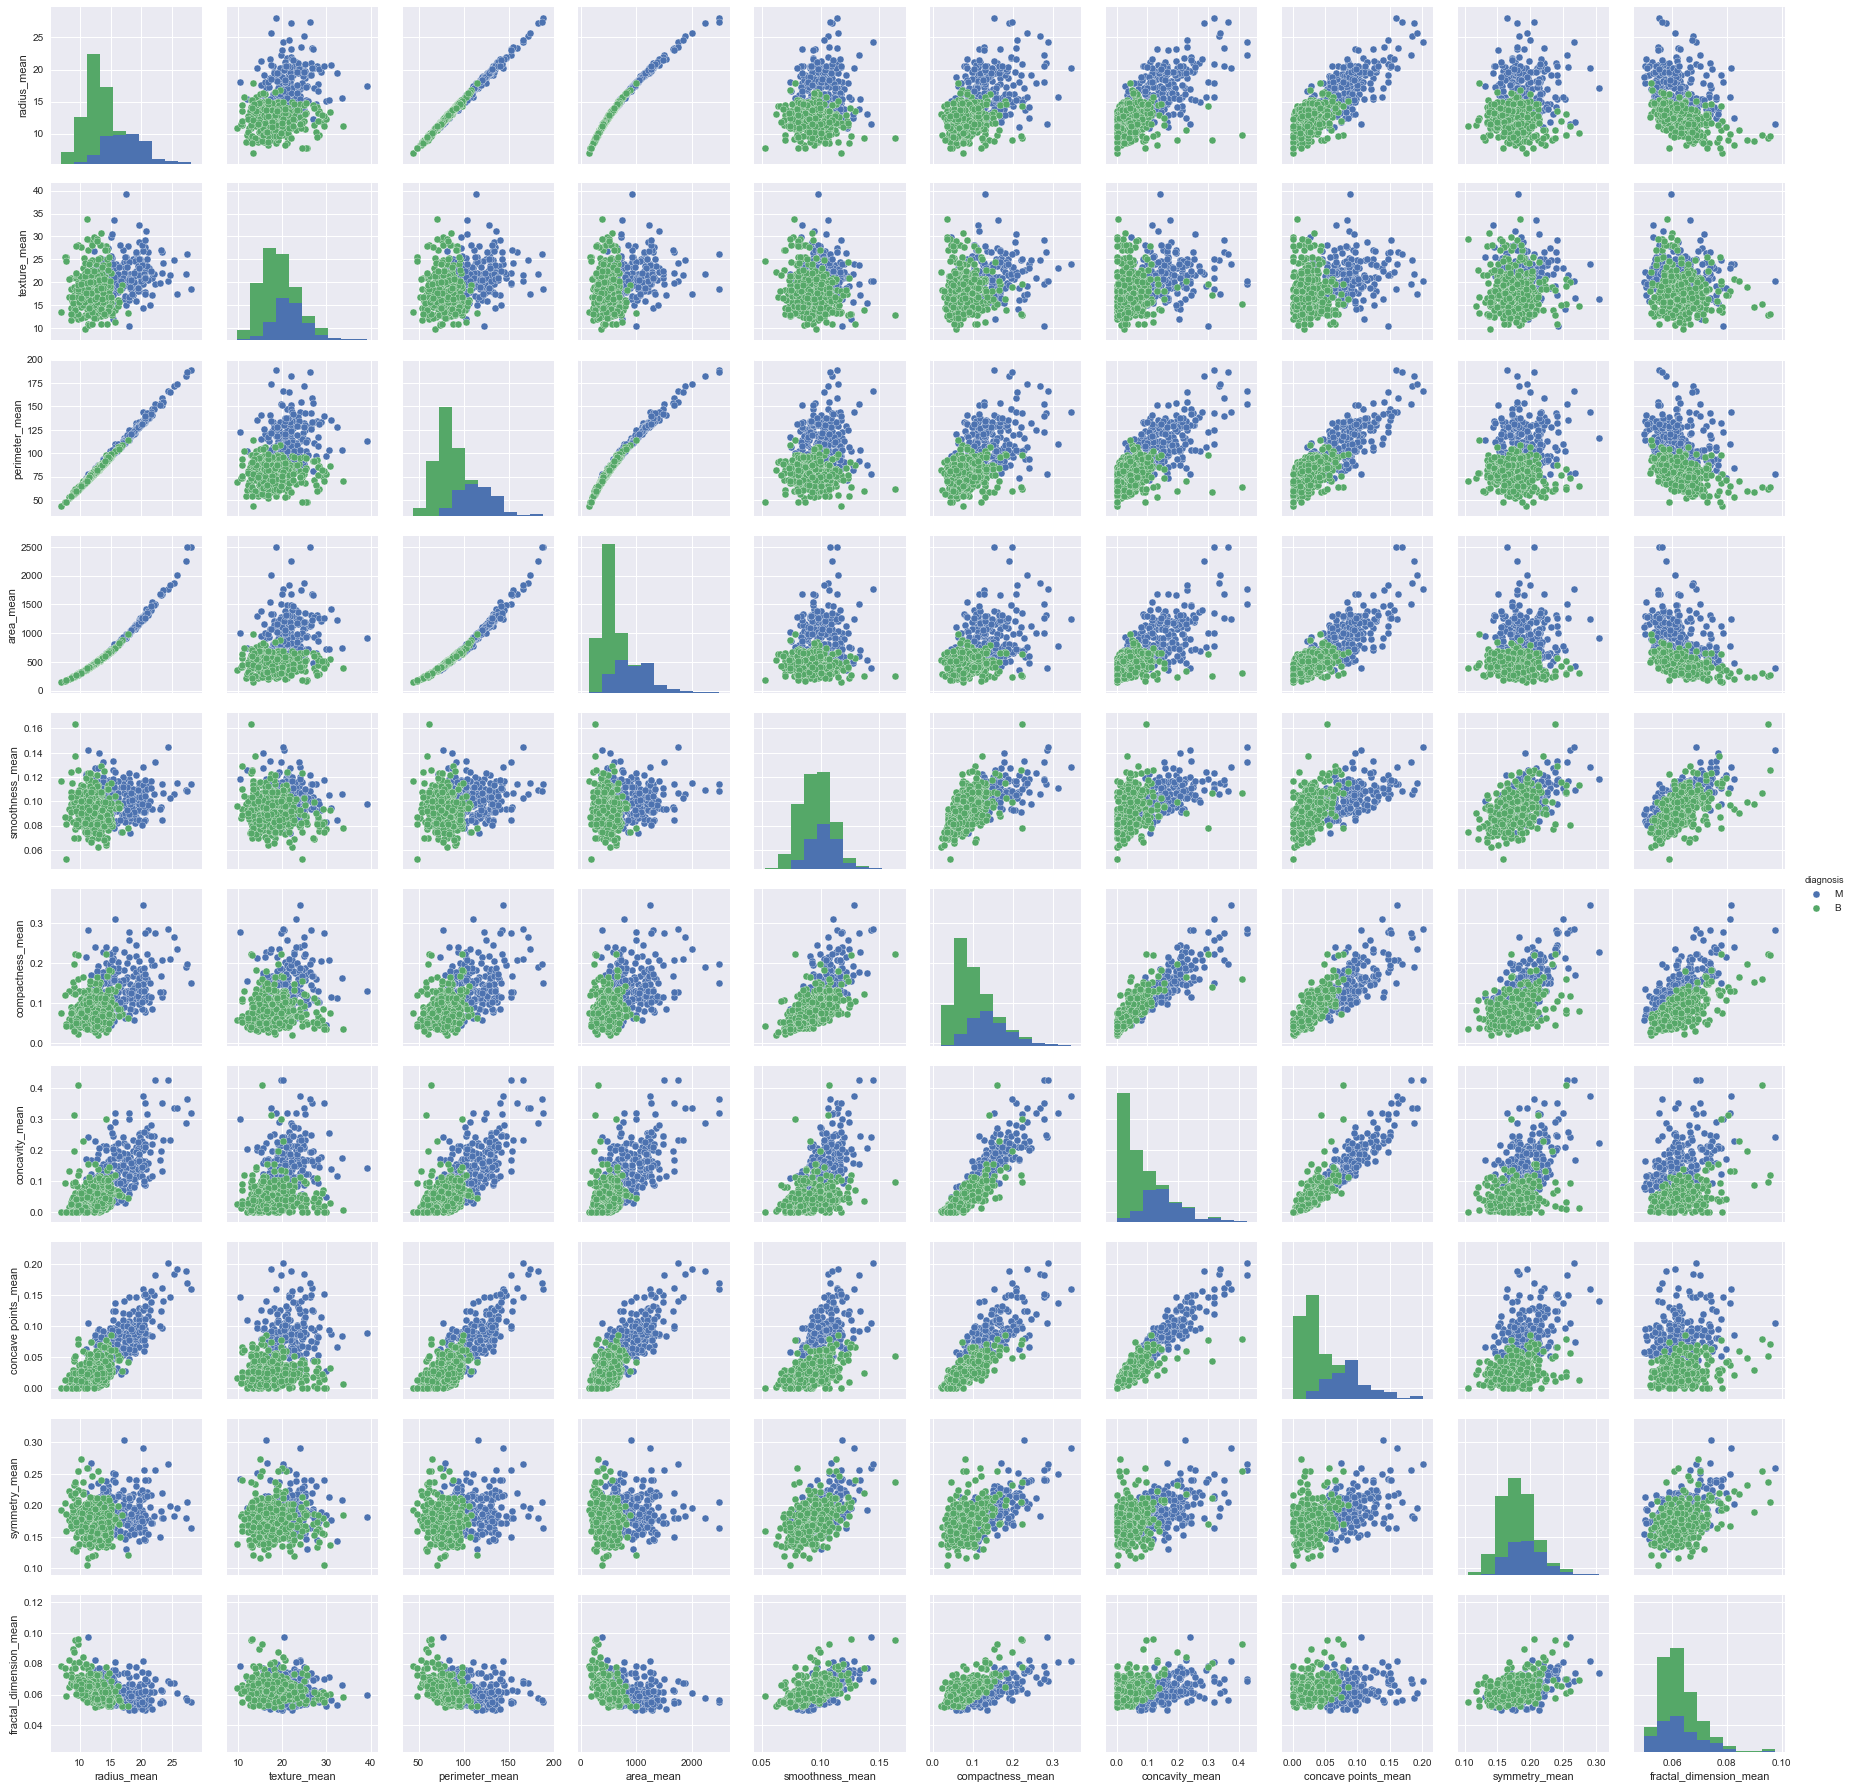

In [6]:
sns.pairplot(df, hue='diagnosis')

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Machine Learning 
### Train Test Split
I am sure, this is on your finger tips now!

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

Few steps that you can lead me through now!
* Importing classifier, 
* creating instance, 
* train (fit) the model on training data and 
* do the predictions for test data, right? <br>

Let's do this step by step. Note, SVC (support vector classifier) is in the svm class!

### Importing and  training the Support Vector Classifier

In [10]:
#Importing SVC
from sklearn.svm import SVC

In [11]:
#Creating instance 'svm_model'
svm_model = SVC()

In [12]:
# training / fitting the model 
svm_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In the out put from `.fit()`, You see there are number of parameters such as C, degree, gamma kernel etc, we will come back and look at them in a while. Let's keep the default at the moment to keep the things little simpler! 

### Predictions 

In [13]:
# Guess what, time to do the predictions!
predictions = svm_model.predict(X_test)

### Evaluation -- Classification report and Confusion matrix

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[103   5]
 [ 50  13]]
             precision    recall  f1-score   support

          B       0.67      0.95      0.79       108
          M       0.72      0.21      0.32        63

avg / total       0.69      0.68      0.62       171



Its not very bad but if you remember, we got very good results in the previous sections using other models such as KNN and Logistic Regression. SVM should do much better than what it is doing now. We need to adjust the parameters. <br>
Finding the right parameter is important and GridSearch plays its role here!



### Gridsearch
Although, it is tricky but very important to find the right parameter so that the model work at its full. Gridsearch is a common way by creating a "grid" of parameters and try all the possible combinations to see which one works the best. Scikit-learn has a built-in capability to implement Gridsearch with [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)...Great and simple, right :)<br> Important members of `GridSearchCV` are fit and predict. GridSearchCV implements a “fit” and a “score” method. <br>
GridSearchCV takes a dictionary and the grid of parameters is defined in that dictionary, where the keys are the parameters and the values are the settings to be tested.<br>

**The C parameter** trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

**The gamma parameter** defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors. <br>
The behavior of the model is very sensitive to the **gamma** parameter. If **gamma is too large**, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.<br>
When **gamma is very small**, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

Want to know more on the C and gamma parameters, see the [official documentation at scikit-learn with examples](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html) 

&#9758; *Please go though the recommended reading to understand the mathematical concepts behind these parameters.*<br>
If you are interested in more practical use of Support Vector Machines (SVM), you can take a message that C and gamma parameters you can adjust using the Gridsearch. <br>


We need to find the best value of C and gamma. Let's do some practical stuff and learn how to create a parameter grid for C and gamma so that scikit-learn take the values to test!<br>
Let's create a grid `param_grid`, a dictionary with lists of values that we want to test for C and gamma parameters.

In [16]:
param_grid = {'C': [0.1,1, 10, 100, 1000],
              'gamma': [1,0.1,0.01,0.001,0.0001]}#,
#              'kernel': ['rbf']} 

In [17]:
# We need to import GridSearchCV from model_selection
from sklearn.model_selection import GridSearchCV

Let's create an instance and pass the following parameters:<br>
* estimator : estimator object `SVC()` in our case
* param_grid : dict or list of dictionaries. Dictionary with parameters names (string) as keys and lists of parameter settings to try as values, or a list of such dictionaries, in which case the grids spanned by each dictionary in the list are explored. This enables searching over any sequence of parameter settings.
* verbose : integer -- Controls the verbosity: the higher, the more messages. If you don't pass any value to this, you will not see any message. Just to see if the GridSearch process is working, its always good idea to see some output, hence good to pass some small number! Gridsearch takes long time, specially when we have lots of parameters to check
* refit : boolean, default=True -- Refit the best estimator with the entire dataset. If "False", it is impossible to make predictions using this GridSearchCV instance after fitting.<br>

&#9758; *Another important thing to know about **`GridSearchCV`**. It **is a meta-estimator**. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, **`grid`** will behave same as `SVC` classifier.*<br>



In [18]:
#shift+tab for doc string
grid = GridSearchCV(SVC(), param_grid, verbose=2)#refit = True by default


As grid will behave same as SVM, so, just like any other model, let's call `fit` on `grid` an pass in the training data. The fit in this case does little more than the usual fit in any other model. First, the fit find the best parameter combination by running same loop with cross-validation. After getting the best parameters, it runs fit again on all data passed to fit (without cross-validation) and built a single new model using the best parameter setting. 

In [19]:
# Let's fit the data now
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ................................. C=1, gamma=0.001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................................ C=1, gamma=0.0001, total=   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

We can check the best parameters combination.

In [20]:
print('The best parameters are %s with a score of %0.2f' 
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1000, 'gamma': 0.0001} with a score of 0.89


In [21]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [22]:

#grid.cv_results_

We can also get the best estimator, score etc `grid.best_estimator_,grid.best_score_` .

In [23]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predictions and Evaluation

We do the predictions in the same way as other models!

In [24]:
grid_predictions = grid.predict(X_test)

And now the confusion matrix and the classification report and !

In [25]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[103   5]
 [ 10  53]]
             precision    recall  f1-score   support

          B       0.91      0.95      0.93       108
          M       0.91      0.84      0.88        63

avg / total       0.91      0.91      0.91       171



Great, you can see that the results are way better and improved with the best parameters. You can imagine the importance of Gridsearch for Support Vector Machine model. You may not be able to get an idea about the best values of your parameter (e.g. C and gamma here) without Gridsearch process. <br>
Once again, keep it in your mind that the Gridsearch can take really long time, especially for the large data sets and bunch parameters. It also depends upon your computer. <br>
The best way in the real life data projects is, to set things up after cleaning the data. Do the Gridsearch on smaller set of grids (e.g. 1, 2 or 3) to make sure that it works correctly. Once you see things are working, then set it on full set of parameters with as many value as you want in the list for each of your parameters. <br>
In this way, you will save time as you know it worked on small set and will possible work on the full set of parameters. It will take time and you can do something different!

## Excellent
We are done with SVMs, lets move on and practice the skills on another dataset.